Taller 2
======

------

El objetivo del taller es ganar un entendimiento más profundo de los temas que entran en el segundo parcial.
Por tal motivo, se deben resolver los siguientes ejercicios y responder las preguntas justificando adecuadamente.

### Evaluación y entrega

- El taller se realiza en grupos de 2 ó 3 personas.
- La evaluación será mediante un coloquio con los docentes durante la clase.

In [2]:
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt

## Ejercicio 1
Dada la siguiente matriz
$$
A =
\begin{pmatrix}
	1 & \sqrt{3} & 0 \\
	\sqrt{3} & 4 & \sqrt{3}/2 \\
	0 & \sqrt{3}/2 & 7/4
\end{pmatrix}
$$

Hallar $A = U \Sigma V^t$ la descomposición en valores singulares de $A$ utilizando únicamente la función [eig](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html) de Numpy para calcular los autovalores y autovectores necesarios.

__Sugerencia__: Considerar alguna propiedad de la matriz que pueda resultar de utilidad para simplificar los cálculos. 


In [74]:
A = np.array([[1,          np.sqrt(3),   0           ],
              [np.sqrt(3), 4,            np.sqrt(3)/2],
              [0,          np.sqrt(3)/2, 7/4         ]])

print(A)

[[1.         1.73205081 0.        ]
 [1.73205081 4.         0.8660254 ]
 [0.         0.8660254  1.75      ]]


In [91]:
# A @ A.T
# A.T @ A

aval, avec = eig(A @ A.T)

P = np.array([
    [1, 0, 0],
    [0, 0, 1],
    [0, 1, 0]
])

U = avec
V = avec
E = np.diag(np.sqrt(aval))

np.allclose((U @ P.T) @ (P @ E @ P) @ (P.T @ V.T), A)

True

(A.T ui) / sigmai = vi

Como A es simétrica, los autovectores de A@A.T y de A.T@A son los mismos, con lo que U = V, y nos ahorramos las cuentas de arriba.

## Ejercicio 2


Dado el siguiente sistema lineal sobredeterminado:

$$
A x = b \\
\begin{pmatrix}
1  & 0  & 0 \\
0  & 1  & 0 \\
0  & 0  & 1 \\
-1 & 1  & 0 \\
0  & -1 & 0 \\
-1 & 0  & 1
\end{pmatrix}
%
\begin{pmatrix}
x_a \\
x_b \\
x_c
\end{pmatrix}
=
\begin{pmatrix}
1 \\ 
2 \\ 
3 \\
1 \\
2 \\
1
\end{pmatrix}
$$

- Hallar $x^*$ mediante cuadrados mínimos, utilizando ecuaciones normales. ¿Bajo que condiciones esta solución es única?


- Probar que el residuo, $r = b-Ax$ resulta ortogonal a $Im(A)$ si $x = x^*$ es la solución de cuadrados mínimos


- Dar una interpretación geométrica de la solución de cuadrados mínimos lineales para *este ejemplo*.

__Sugerencia:__ Utilizar la función [solve](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html) de Numpy para encontrar la solución de un sistema determinado.


In [93]:
from numpy.linalg import solve

A = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1],
              [-1,1, 0],
              [0,-1, 0],
              [-1,0, 1]])

b = np.array([1, 2, 3, 1, 2, 1])

# la solucion es única <=> las columnas de "A" son li

# A.T A x = A.T b
x = solve(A.T @ A, A.T @ b)

# Prueba con numpy para verificar
x_np = np.linalg.lstsq(A, b)[0]

np.allclose(x, x_np)


/home/lggomez/.pyenv/versions/3.6.5/envs/talleres/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


True

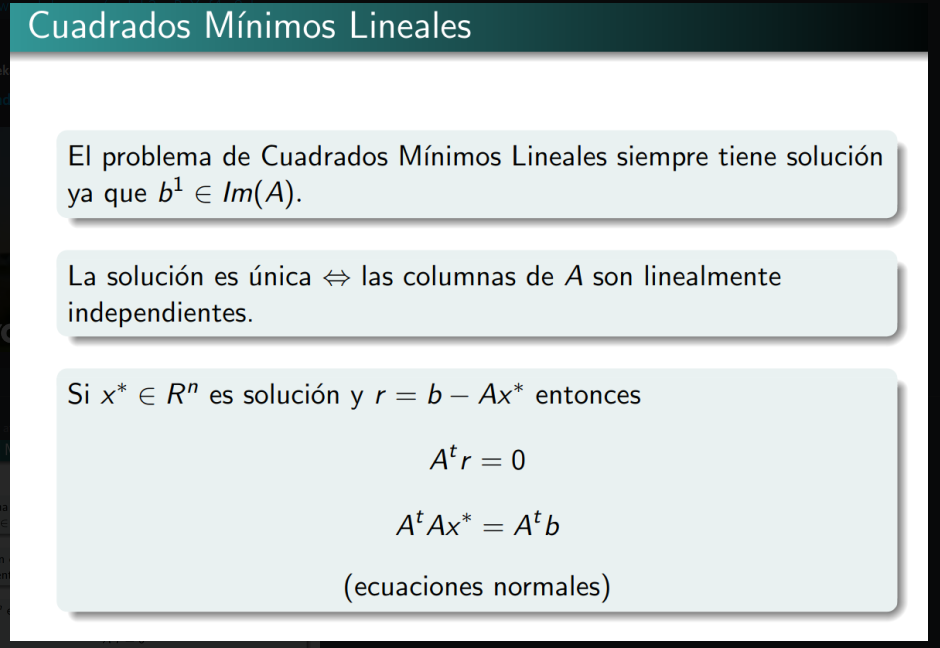

Para ver que r es ortogonal, basta con multiplicar con la base de la imagen de A y ver que su producto interno es 0. Tomamos como base las columnas de A.

In [94]:
r = b - A @ x_np

print(np.allclose(np.dot(r, A[:,0]), 0))
print(np.allclose(np.dot(r, A[:,1]), 0))
print(np.allclose(np.dot(r, A[:,2]), 0))

# hacer explicación más analítica
# hacer interpretacion geométrica

True
True
True


A.T @ A @ x* = A.T b

0 = A.T @ (b - A @ x*)

0 = A.T @ r

A.T, cada una de sus filas es un generador de Im(A), entonces, fila_i(A.T) * r = 0, entonces r y fila_i(A.T) son ortogonales

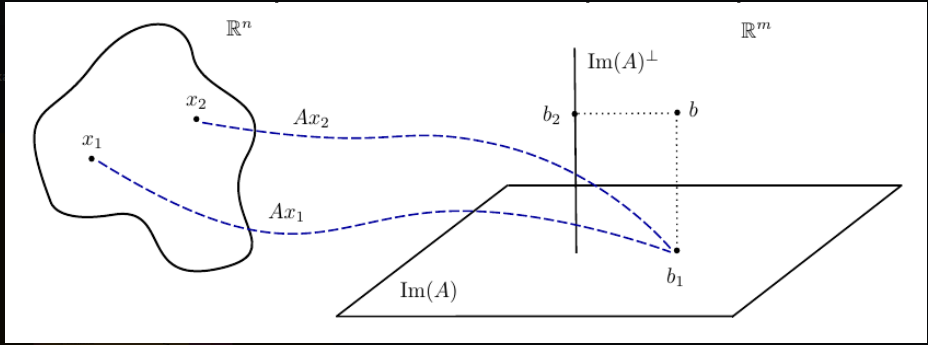

1. La nube es "dom(A)"
2. El problema es que b no está en la im(A), entonces, A x = b, no tendría solución.
3. b1 es nuestra aproximación por CML
4. b2 = r
5. En este caso, caso gráfico, x1 y x2 son dos soluciones a CML

## Ejercicio 3

- Completar los métodos de Jacobi y Gauss-Seidel. Tener en cuenta que las funciones también deben devolver el vector de errores que resulta de comparar la solución aproximada de una iteración contra la solución conocida $x\_direct$ obtenida mediante la  función [solve](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html) de Numpy.

- Probar los métodos con la matriz A (definida en el código), graficar y  analizar el error de la solución. ¿Converge a una solución?¿Cómo podría justificarse lo anterior?


In [36]:
A = np.array([[8,np.sqrt(2),1/3],
              [np.sqrt(3),10, 5.5],
              [0,1 , 7/6]])

np.triu(A, 1) * -1

array([[-0.        , -1.41421356, -0.33333333],
       [-0.        , -0.        , -5.5       ],
       [-0.        , -0.        , -0.        ]])

In [47]:
def jacobi(A,b,reps,x_ini,x_direct):
    # Matrices para los metodos iterativos
    D = np.diag(np.diag(A))
    L = np.tril(A, -1) * -1
    U = np.triu(A, 1) * -1

    Dinv = np.linalg.inv(D)
    
    # T = D^(-1)(L+U)
    # c = D^(-1)b
    # x^(n+1) = T @ x^n + c
    
    T = Dinv @ (L+U)
    c = Dinv @ b

    print("radio espectral: ", np.max(np.abs(np.linalg.eigvals(T))))
    
    xi = x_ini
    error = []
    for i in range(reps):
        xi = T @ xi + c
        error.append(np.linalg.norm(xi - x_direct))
    return xi, error

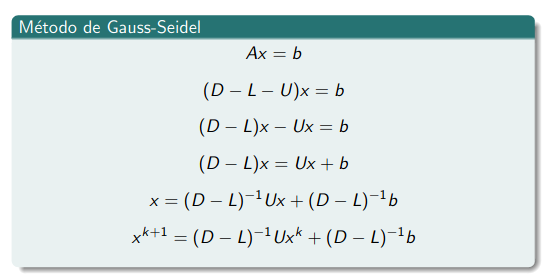

In [53]:
def gauss_seidel(A,b,reps,x_ini,x_direct):
    # Matrices para los metodos iterativos
    D = np.diag(np.diag(A))
    L = np.tril(A, -1) * -1
    U = np.triu(A, 1) * -1

    T = np.linalg.inv(D-L) @ U
    c = np.linalg.inv(D-L) @ b

    print("radio espectral: ", np.max(np.abs(np.linalg.eigvals(T))))
    
    xi = x_ini
    error = []
    for i in range(reps):
        xi = T @ xi + c
        error.append(np.linalg.norm(xi - x_direct))
    return xi, error

radio espectral:  0.7146350216679591
Jacobi:
Estimacion: [ 0.74628648 -1.36616872  2.88528748]
Respuesta correcta [ 0.74628648 -1.36616872  2.88528748]


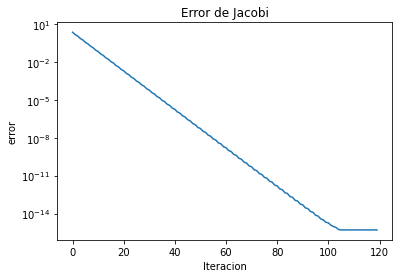

In [48]:
A = np.array([[8,np.sqrt(2),1/3],
              [np.sqrt(3),10, 5.5],
              [0,1 , 7/6]])
b = np.array([5,3.5,2])

x = np.linalg.solve(A,b)

x_jacobi, error = jacobi(A, b, 120, np.random.rand(b.shape[0]), x)

print("Jacobi:")
print("Estimacion:", x_jacobi)
print("Respuesta correcta", x)

plt.plot(error)
plt.title("Error de Jacobi")
plt.xlabel("Iteracion")
plt.ylabel("error")
plt.yscale('log')
plt.show()

radio espectral:  0.49586129747204377
Gauss-Seidel:
Estimacion: [ 0.74628648 -1.36616872  2.88528748]
Respuesta correcta [ 0.74628648 -1.36616872  2.88528748]


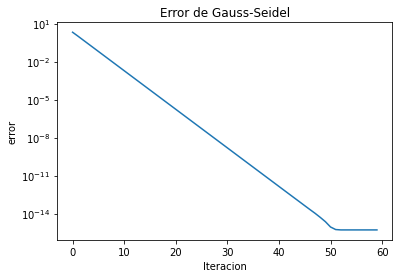

In [55]:
# Idem para gauss-seidel
x_gs, error = gauss_seidel(A, b, 60, np.random.rand(b.shape[0]), x)

print("Gauss-Seidel:")
print("Estimacion:", x_gs)
print("Respuesta correcta", x)

plt.plot(error)
plt.title("Error de Gauss-Seidel")
plt.xlabel("Iteracion")
plt.ylabel("error")
plt.yscale('log')
plt.show()



Vemos que ambos métodos convergen para el sistema planteado porque el radio espectral para ambas matrices T es menor que 1

## Ejercicio 4


Considerar los siguientes datos que fueron generados a partir de un polinomio de grado 2:

$$p(x) = 4 x + 0.5 x^2 + C$$

donde $C$ ruido agregado con distribución normal

Los mismos serán los datos a ajustar utilizando cuadrados mínimos lineales.

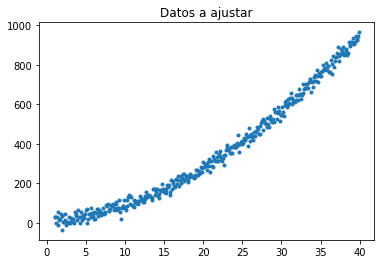

In [56]:
def p(x):
    'implementa la funcion p(x) enunciada en la celda de arriba, pero asumiendo x como un vector'
    y = 4 * x + 0.5 * x ** 2 + np.random.randn(*x.shape) * 20
    return y

# Creo valores entre 1 y 40 espaciados 0.1
x = np.arange(1, 40, 0.1)
y = p(x)

plt.plot(x, y, '.')
plt.title('Datos a ajustar')
plt.show()

### Propuesta: 
La idea será ajustar un polinomio $f(x)$ de grado 4 a los datos anteriores. 
Es decir, considerando la familia de funciones $F = \{x,x^{2},x^{3},x^{4}\}$ queremos encontrar una función $f(x) = a_{0}x+a_{1}x^{2}+a_{2}x^{3}+a_{3}x^{4}$, una combinación lineal de ellas, que "mejor aproxime", en términos de cuadrados mínimos, a $p(x)$. 

### Implementación:
Para esto, podríamos utilizar cuadrados mínimos a través de ecuaciones normales resueltas por un método directo (_np.linalg.solve_).
Recordar que la matriz A de CML tiene la siguiente forma:
$$A=
\begin{pmatrix}
\delta_{1}(x_{1}) & \delta_{2}(x_{1}) & \ldots  & \delta_{n}(x_{1}) \\
\vdots & \vdots & \ldots & \vdots \\
\delta_{1}(x_{m}) & \delta_{2}(x_{m}) & \ldots  & \delta_{n}(x_{m}) \\
\end{pmatrix} $$


En este caso particular, utilizando la función [np.stack](https://numpy.org/doc/stable/reference/generated/numpy.stack.html) y el vector x creado previamente, buscamos:

$$A=
\begin{pmatrix}
x_{1} & x_{1}^{2} & x_{1}^{3} & x_{1}^{4} \\
\vdots & \vdots & \ldots & \vdots \\
x_{390} & x_{390}^{2} & x_{390}^{3} & x_{390}^{4} \\
\end{pmatrix} $$



In [57]:
A = np.stack([x, x ** 2, x ** 3, x ** 4]).T
b = y

AtA = A.T @ A 
Atb = A.T @ b

x_direct = np.linalg.solve(AtA, Atb)
print("Solucion encontrada:" + str(x_direct)) 

Solucion encontrada:[ 6.05801297e+00  1.91167476e-01  1.33540588e-02 -1.76540926e-04]


### Responder:

- Estimar la solución de cuadrados mínimos utilizando los métodos iterativos del punto 3 y graficar los errores de los métodos (con respecto a la solución hallada con el método directo) en función de las iteraciones.
- Indicar si los métodos convergen. Justificar adecuadamente.



radio espectral:  0.999919218909844
Gauss-Seidel:
Estimacion: [ 6.05801297e+00  1.91167476e-01  1.33540588e-02 -1.76540926e-04]
Respuesta correcta [ 6.05801297e+00  1.91167476e-01  1.33540588e-02 -1.76540926e-04]


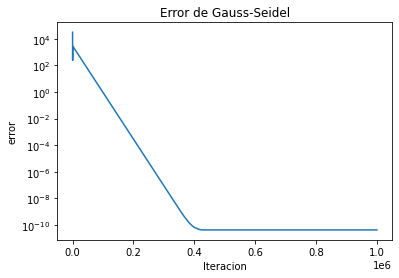

In [80]:
# Jacobi
# x_ini = np.random.rand(Atb.shape[0])
# reps = 100
# x_jacobi, error = jacobi(AtA, Atb, reps, x_ini, x_direct)

# print("Jacobi:")
# print("Estimacion:", x_jacobi)
# print("Respuesta correcta", x_direct)

# plt.plot(error)
# plt.title("Error de Jacobi")
# plt.xlabel("Iteracion")
# plt.ylabel("error")
# plt.yscale('log')
# plt.show()


# Gauss-Seidel
x_ini = np.random.rand(Atb.shape[0])
reps = 1000000
x_gs, error = gauss_seidel(AtA, Atb, reps, x_ini, x_direct)

print("Gauss-Seidel:")
print("Estimacion:", x_gs)
print("Respuesta correcta", x_direct)

plt.plot(error)
plt.title("Error de Gauss-Seidel")
plt.xlabel("Iteracion")
plt.ylabel("error")
plt.yscale('log')
plt.show()

# ¿hay una relación entre la velocidad de convergencia y el radio espectral?

El de jacobi: no converge, radio espectral >= 1

El de gauss-seidel: __debería__ converger porque el radio espectral < 1, según lo que vemos en el gráfico "da muchas vueltas" antes de converger.

### Ajustando la función

Recapitulando, queríamos encontrar con CML los coeficientes para $f(x) = a_{0}x+a_{1}x^{2}+a_{2}x^{3}+a_{3}x^{4}$. 

Para encontrar la solución, utilizamos ecuaciones normales que resolvimos primero utilizando un método directo y luego uno iterativo. Idealmente, ambas soluciones deberían "parecerse".

Finalmente, nos interesa ver como se ajusta nuestra función a los datos originales.

### Responder: 
- A partir de lo anterior, fittear la función estimada, f(x) a los datos originales. Mostrar en un gráfico.
- ¿Qué puede decirse sobre los valores estimados de los coeficientes de mayor grado?

In [68]:
def f(x,coef):
    'implementar la funcion f(x) que ajustará a los datos'
    'tener en cuenta que x esta en R y coef es el vector con los coeficientes a_0 ... a_3'
    return sum([c * x**(i+1) for i,c in enumerate(coef)])

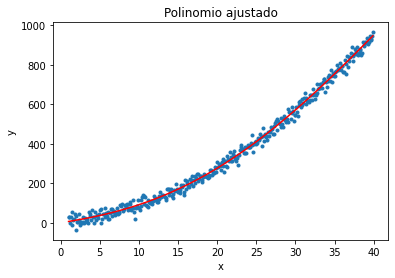

In [69]:
coef = x_direct
y_pred = f(x,coef)

plt.plot(x,y, '.') # puntos originales

plt.plot(x,y_pred, 'r') # puntos estimados

plt.title("Polinomio ajustado")
plt.xlabel("x")
plt.ylabel("y");

In [72]:
coef

array([ 6.05801297e+00,  1.91167476e-01,  1.33540588e-02, -1.76540926e-04])

Los coeficientes de mayor grado son los que menos aportan

### Predicciones
Vimos que otra de las aplicaciones de este método es poder predecir la variable dependiente para instancias desconocidas. Para ver esto, podemos tomar otro rango de valores de x y observar como se "extrapola"

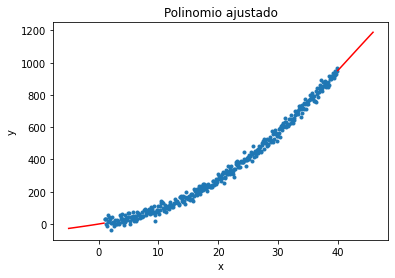

In [70]:
x_new  = np.concatenate([np.arange(-5, 1, 0.1),[np.nan],np.arange(40, 46, 0.1)])
y_pred = f(x_new, coef)

# Puntos originales
plt.plot(x,y, '.')

# Puntos estimados
plt.plot(x_new,y_pred, 'r') 


plt.title("Polinomio ajustado")
plt.xlabel("x")
plt.ylabel("y");
